# 신경망의 수학적 구성 요소

## 신경망과의 첫 만남

**케라스에서 MNIST 데이터셋 적재하기**

In [1]:
from tensorflow.keras.datasets import mnist  # tensorflow 안의 keras의 dataset으로부터 mnist모듈을 import 합니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # mnist.load_data를 train 셋과 test셋으로 나눠 저장합니다. (튜플 형식입니다.)

In [2]:
train_images.shape # train_images의 shape을 확인합니다. 총 60000만개의 train셋이 있습니다.

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels # train_labels의 형태는 배열의 형태이다. 정답지

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape # test셋의 이미지는 총 10000장이고, 28x28개의 pixel을 가지고 있음

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 신경망 구조

In [8]:
from tensorflow import keras                 # keras import
from tensorflow.keras import layers          # layers를 import
model = keras.Sequential([                   # Sequential은 간단하게 연속적인 신경망을 만들 수 있는 도구이다.
    layers.Dense(512, activation="relu"), # input 다음 층은 512개의 node를 가지고, 활성화 함수는 ReLU
    layers.Dense(10, activation="softmax") # 그 다음층은 10개의 node를 가지고, 활성화 함수는 SoftMax
])

### 컴파일 단계

In [9]:
model.compile(optimizer="rmsprop",  # 옵티마이저는 Root Mean Square Propagation
              loss="sparse_categorical_crossentropy", # 손실 함수는 희소 볌주형 교차 엔트로피
              metrics=["accuracy"]) # metrics는 평가 지표를 의미합니다. 여기서는 "정확도"로 설정

## 이미지 데이터 준비하기

In [10]:
train_images = train_images.reshape((60000, 28 * 28)) # 이미지의 배열을 (60000, 784)로 재배열 한다. 훈련 중에 데이터를 더 효과적으로 전달하기 위함.
train_images = train_images.astype("float32") / 255 # 0~255의 값을 0.0~1.0사이의 값으로 반환
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype("float32") / 255

## 모델 훈련

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
# (입력 데이터, 정답지, 에포크, 배치 사이즈)

Epoch 1/5
469/469 [==============================] - 2s 1ms/step - loss: 0.2599 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1046 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0689 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0490 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0372 - accuracy: 0.9888


## 모델을 사용해 예측 만들기

In [12]:
test_digits = test_images[0:10] # 데이터 세트에서 처음 10장의 사진을 선택
predictions = model.predict(test_digits) # 위의 "model"을 사용하여 test_digits에 대한 예측을 실행
predictions[0] # 첫 번째 테스트 이미지에 대한 모델의 예측

array([7.9008075e-08, 4.4367257e-10, 2.6377476e-05, 1.2570401e-04,
       1.3241687e-11, 1.5598937e-07, 5.7059697e-14, 9.9983990e-01,
       1.5370343e-07, 7.5690950e-06], dtype=float32)

In [13]:
predictions[0].argmax() # 가장 확률이 높은 배열의 인덱스를 반환

7

In [14]:
predictions[0][7] # 첫 번째 이미지 테스트에 대한 예측 확률

0.9998399

In [15]:
test_labels[0]

7

## 새로운 데이터에서 모델 평가하기

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # test 데이터 세트에서 모델의 성능을 평가한다. 평가 후에 손실 값은 test_loss에, 정확도는 test_acc에 저장된다.
print(f"테스트 정확도: {test_acc}")


  1/313 [..............................] - ETA: 28s - loss: 0.0269 - accuracy: 0.9688

313/313 [==============================] - 0s 951us/step - loss: 0.0672 - accuracy: 0.9802
테스트 정확도: 0.9801999926567078


# 신경망을 위한 데이터 표현

## 스칼라 (랭크-0 텐서)

In [17]:
import numpy as np
x = np.array(12) # 수치 연산에 최적화 된 다차원 데이터 구조인 넘파이 배열로 반환한다.
x

array(12)

In [18]:
x.ndim # 넘파이 배열의 차원 수를 알려준다.

0

## 벡터 (랭크 -1 텐서)

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim # 1차원의 배열

1

# 행렬 (랭크 -2 텐서)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]) # 2차원 넘파이 배열 생성
x.ndim

2

### 랭크-3 텐서와 더 높은 랭크의 텐서

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]]) # 3차원 넘파이 배열 생성
x.ndim

3

### 핵심 속성

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images.ndim # train_images는 3차원 배열

3

In [25]:
train_images.shape # 이미지의 샘플 수, 가로(28 pixel), 세로(28 pixel)

(60000, 28, 28)

In [26]:
train_images.dtype # uint8은 픽셀 값을 나타내는 일반적인 데이터 유형이다. 

dtype('uint8')

### 다섯 번째 이미지 출력하기

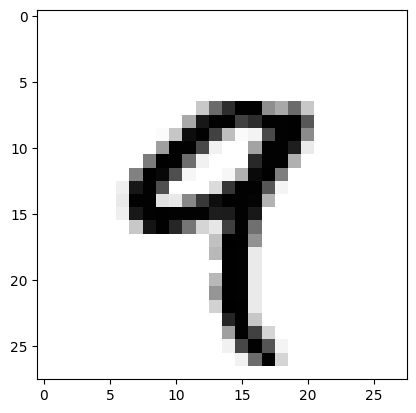

In [27]:
import matplotlib.pyplot as plt # matplotlib.pyplot 를 import 합니다.
digit = train_images[4] # train_images 배열의 5번째를 digit에 저장합니다.
plt.imshow(digit, cmap=plt.cm.binary) # plt.cm.binary는 회색조 이미지를 표시하는데 적합한 컬러맵을 지정합니다.
plt.show()

In [28]:
train_labels[4] # 정답은 9

9

### 넘파이로 텐서 조작하기

In [29]:
my_slice = train_images[10:100] # 10~99번째 배열까지 슬라이싱
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, :, :] # 선택한 각 이미지의 모든 행과 열을 포함합니다.
my_slice.shape

(90, 28, 28)

In [31]:
my_slice = train_images[10:100, 0:28, 0:28] # (10~99, 0~27, 0~27)
my_slice.shape

(90, 28, 28)

In [32]:
my_slice = train_images[:, 14:, 14:]
# my_slice.shape = (60000, 14, 14)

In [33]:
my_slice = train_images[:, 7:-7, 7:-7]
# my_slice.shape = (60000, 14, 14)
# 7:-7은 7번째 픽셀부터 21번째 픽셀까지 선택하도록 한다.

### 배치 데이터

In [34]:
batch = train_images[:128] # 0번째부터 127번째 이미지 슬라이싱

In [35]:
batch = train_images[128:256] # 128번째 부터 255번째 이미지 슬라이싱

In [36]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
# 128 * 3 = 384, 128 * 4 = 512 즉, 384번째 이미지부터 511번째 이미지까지 슬라이싱을 한다. 
# 128개의 이미지 묶음을 하나의 배치로 보면, 3번째 미니배치를 슬라이싱 하는 것과 같다.

### 텐서의 실제 사례

### 벡터 데이터

### 시게열 또는 시퀀스 데이터

### 이미지 데이터

### 비디오 데이터

## 신경망의 톱니바퀴: 텐서 연산

### 원소별 연산

In [37]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x